In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

os.chdir(os.path.abspath("C:\\Users\\amali\\Desktop\\prosperity3"))

#for Aryan: /Users/dipalshah/Desktop/prosperity3
#for Tarun: /Users/tarun/Desktop/Finance_Projects/prosperity3
#add yours: right click round_1 folder and copy path, then paste and remove the round_1 part

print("Working directory set to:", os.getcwd())

from tools import Plotter, Regressor

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
p1 = pd.read_csv("round_2/data/prices_round_2_day_-1.csv", sep=";", index_col = "timestamp")
p2 = pd.read_csv("round_2/data/prices_round_2_day_0.csv", sep=";", index_col = "timestamp")
p3 = pd.read_csv("round_2/data/prices_round_2_day_1.csv", sep=";", index_col = "timestamp")
t1 = pd.read_csv("round_2/data/trades_round_2_day_-1.csv", sep=";", index_col = "timestamp")
t2 = pd.read_csv("round_2/data/trades_round_2_day_0.csv", sep=";", index_col = "timestamp")
t3 = pd.read_csv("round_2/data/trades_round_2_day_1.csv", sep=";", index_col = "timestamp")

In [ ]:
p1

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
0,-1,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
0,-1,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
0,-1,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
0,-1,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999900,-1,DJEMBES,13493,76,NaN,NaN,NaN,NaN,13494,76,NaN,NaN,NaN,NaN,13493.5,0.0
999900,-1,KELP,2028,31,NaN,NaN,NaN,NaN,2030,6,2031.0,31.0,NaN,NaN,2029.0,0.0
999900,-1,RAINFOREST_RESIN,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0


In [ ]:
t1

,buyer,seller,symbol,currency,price,quantity
timestamp,,,,,,
0,NaN,NaN,KELP,SEASHELLS,2029.0,13
0,NaN,NaN,KELP,SEASHELLS,2029.0,1
0,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10004.0,1
0,NaN,NaN,SQUID_INK,SEASHELLS,2006.0,13
0,NaN,NaN,SQUID_INK,SEASHELLS,2006.0,1
...,...,...,...,...,...,...
999500,NaN,NaN,KELP,SEASHELLS,2030.0,2
999500,NaN,NaN,SQUID_INK,SEASHELLS,1972.0,2
999600,NaN,NaN,CROISSANTS,SEASHELLS,4321.0,8


<AxesSubplot:>

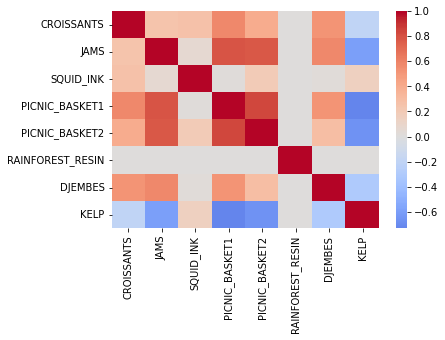

In [ ]:
p = p1

prices_by_product = pd.DataFrame([p[p["product"] == product]["mid_price"].values for product in p["product"].unique()])
prices_by_product = prices_by_product.transpose()
prices_by_product.columns = p["product"].unique()
prices_by_product.index = p[p["product"] == "KELP"].index

corr = prices_by_product.corr()
sns.heatmap(corr, cmap = "coolwarm", center = 0)

<AxesSubplot:>

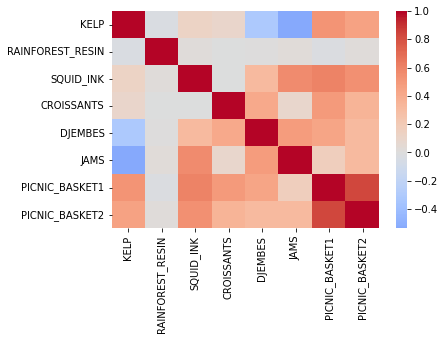

In [ ]:
trades_by_product = pd.DataFrame([t1[t1["symbol"] == product]["price"].values for product in t1["symbol"].unique()])
trades_by_product = trades_by_product.transpose()
trades_by_product.columns = t1["symbol"].unique()
trades_by_product.index = t1.index

corr = trades_by_product.corr()
sns.heatmap(corr, cmap = "coolwarm", center = 0)

In [ ]:
prices_by_product

,CROISSANTS,JAMS,SQUID_INK,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,DJEMBES,KELP
timestamp,,,,,,,,
0,4304.5,6670.5,2005.5,59289.0,30609.0,10003.0,13450.5,2028.5
100,4304.5,6670.5,2005.5,59287.0,30613.0,10000.0,13450.0,2026.5
200,4304.5,6671.0,2004.5,59293.5,30615.0,10000.0,13450.5,2026.5
300,4304.5,6672.0,2004.5,59293.5,30620.5,10000.0,13450.0,2026.5
400,4305.5,6672.0,2005.5,59292.0,30621.0,10000.0,13452.5,2026.5
...,...,...,...,...,...,...,...,...
999500,4321.5,6632.0,1971.5,59226.5,30505.5,10002.0,13493.0,2029.5
999600,4321.5,6632.0,1973.0,59232.5,30506.5,10002.0,13493.5,2030.0
999700,4321.5,6632.0,1972.5,59227.0,30507.0,10000.0,13493.5,2030.0


In [ ]:
trades_by_product

,KELP,RAINFOREST_RESIN,SQUID_INK,CROISSANTS,DJEMBES,JAMS,PICNIC_BASKET1,PICNIC_BASKET2
timestamp,,,,,,,,
0,2029.0,10004.0,2006.0,4304.0,13452.0,6671.0,59304.0,30623.0
0,2029.0,9996.0,2006.0,4305.0,13449.0,6674.0,59304.0,30626.0
1700,2026.0,10002.0,2009.0,4305.0,13447.0,6673.0,59306.0,30615.0
1900,2026.0,10002.0,2010.0,4304.0,13449.0,6670.0,59305.0,30614.0
2400,2025.0,9998.0,2009.0,4304.0,13448.0,6672.0,59279.0,30603.0
...,...,...,...,...,...,...,...,...
999100,2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999200,2030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999200,2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


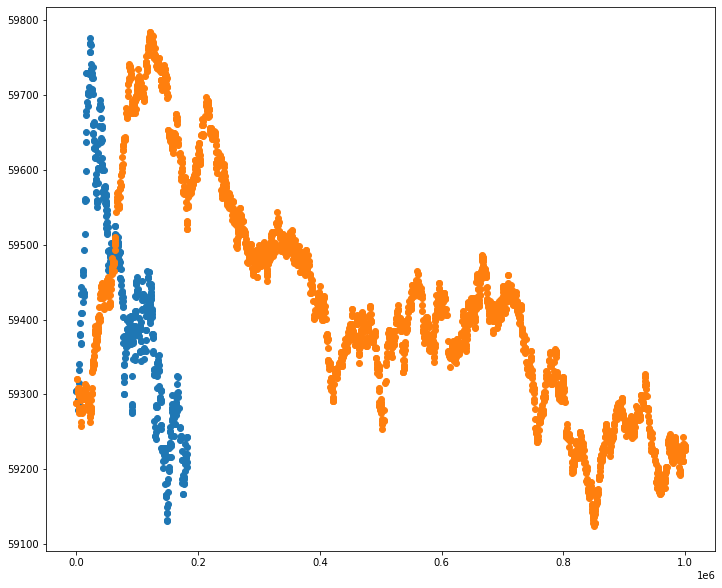

In [ ]:
product = "PICNIC_BASKET1"

plt.figure(figsize=(12, 10))
plt.scatter(trades_by_product[product].index, trades_by_product[product])
plt.scatter(trades_by_product[product].index, prices_by_product[product].loc[trades_by_product[product].index])

In [ ]:
def price_trade_plot(product):
    trades = trades_by_product[product]
    prices = prices_by_product[product]

    plt.scatter(prices.loc[trades.index], trades)
    plt.title(product)
    plt.xlabel("Prices")
    plt.ylabel("Trades")

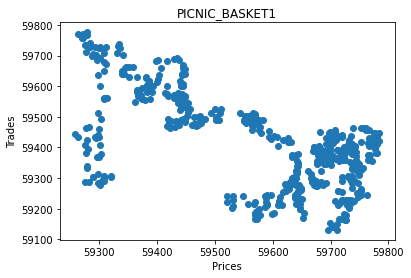

In [ ]:
price_trade_plot("PICNIC_BASKET1")

In [ ]:
import statsmodels.formula.api as smf

prices_by_product["combo1"] = (
    6 * prices_by_product["CROISSANTS"] +
    1 * prices_by_product["DJEMBES"] +
    3 * prices_by_product["JAMS"]
)

model_basket_1 = smf.ols("PICNIC_BASKET1 ~ CROISSANTS + DJEMBES + JAMS", data = prices_by_product)
result_basket_1 = model_basket_1.fit()

print(result_basket_1.summary())

                            OLS Regression Results                            
Dep. Variable:         PICNIC_BASKET1   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 1.300e+04
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:46:22   Log-Likelihood:                -56145.
No. Observations:               10000   AIC:                         1.123e+05
Df Residuals:                    9996   BIC:                         1.123e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6917.5766    491.640     14.070      0.0

In [ ]:
import statsmodels.formula.api as smf

prices_by_product["combo2"] = (
    4 * prices_by_product["CROISSANTS"] +
    2 * prices_by_product["JAMS"]
)

model_basket_2 = smf.ols("PICNIC_BASKET2 ~ CROISSANTS + JAMS", data = prices_by_product)
result_basket_2 = model_basket_2.fit()

print(result_basket_2.summary())

                            OLS Regression Results                            
Dep. Variable:         PICNIC_BASKET2   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     8824.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:46:22   Log-Likelihood:                -53138.
No. Observations:               10000   AIC:                         1.063e+05
Df Residuals:                    9997   BIC:                         1.063e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3696.0231    279.046     13.245      0.0

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint

print(coint(prices_by_product["PICNIC_BASKET1"][1:], prices_by_product["PICNIC_BASKET1"].values[:-1] * (1 + prices_by_product["combo1"].pct_change()[1:])))

(-78.52696576820924, 0.0, array([-3.89753574, -3.3367412 , -3.04487423]))


/var/folders/22/t8xqqxmj2g5c4pnhgzh4g8vw0000gq/T/ipykernel_40499/2458013263.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = result.params[0]


β = 1.0011808365902568
Spread Mean: 21.131250708736875 Spread Std: 78.64587011495676


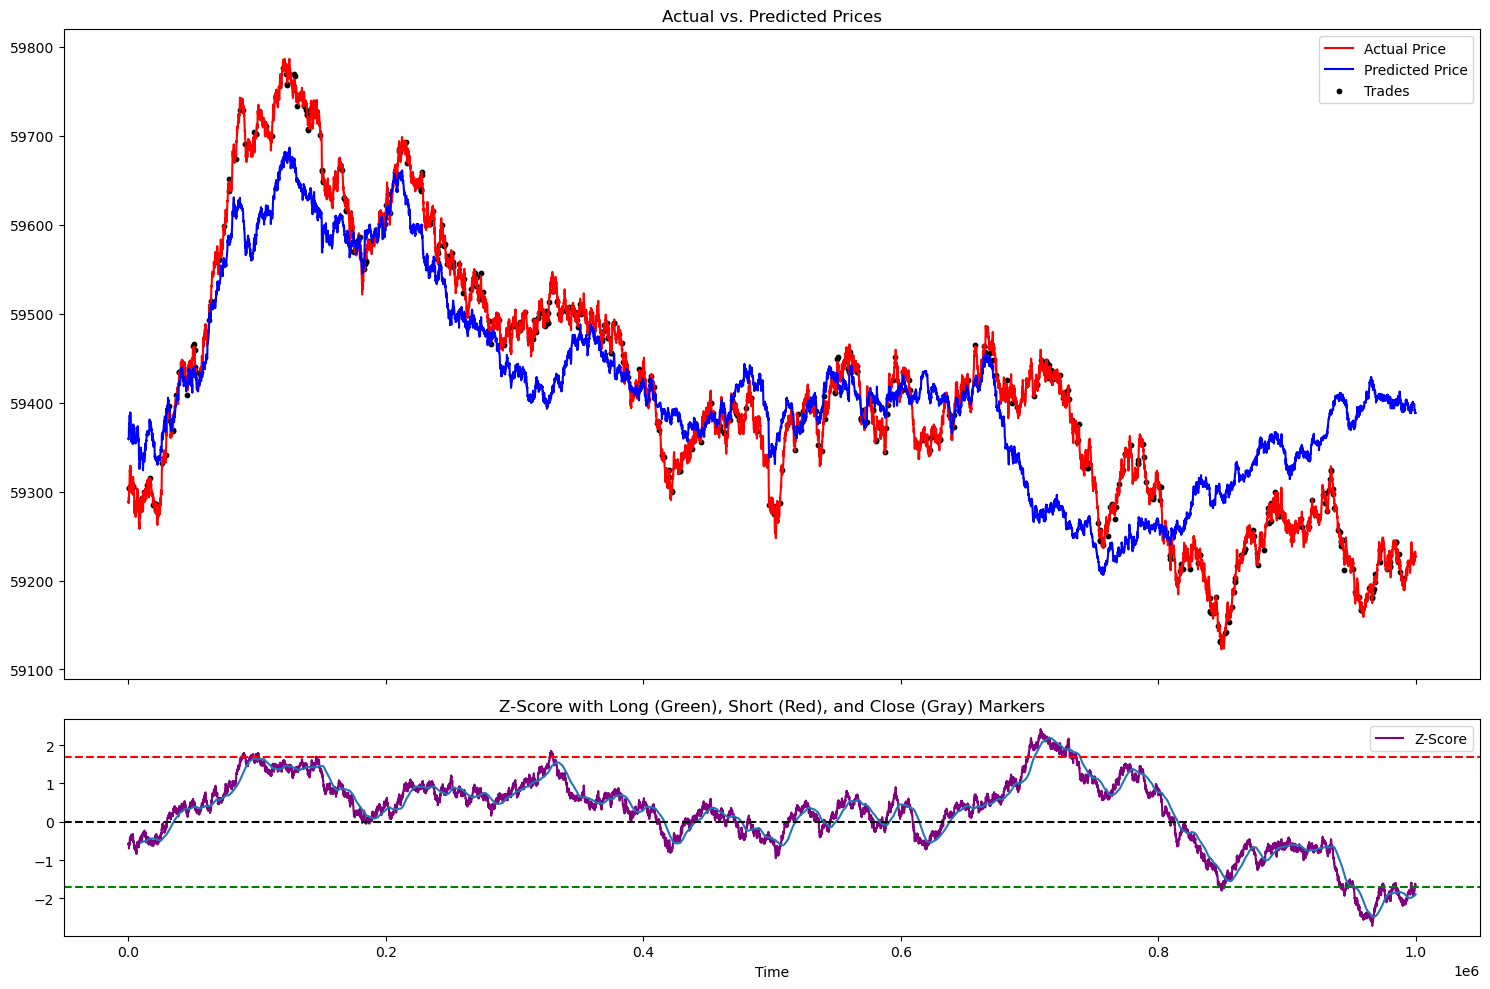

/var/folders/22/t8xqqxmj2g5c4pnhgzh4g8vw0000gq/T/ipykernel_40499/2458013263.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = result.params[0]


β = 1.000739811919047
Spread Mean: -4.77993697244311 Spread Std: 82.8839494297133


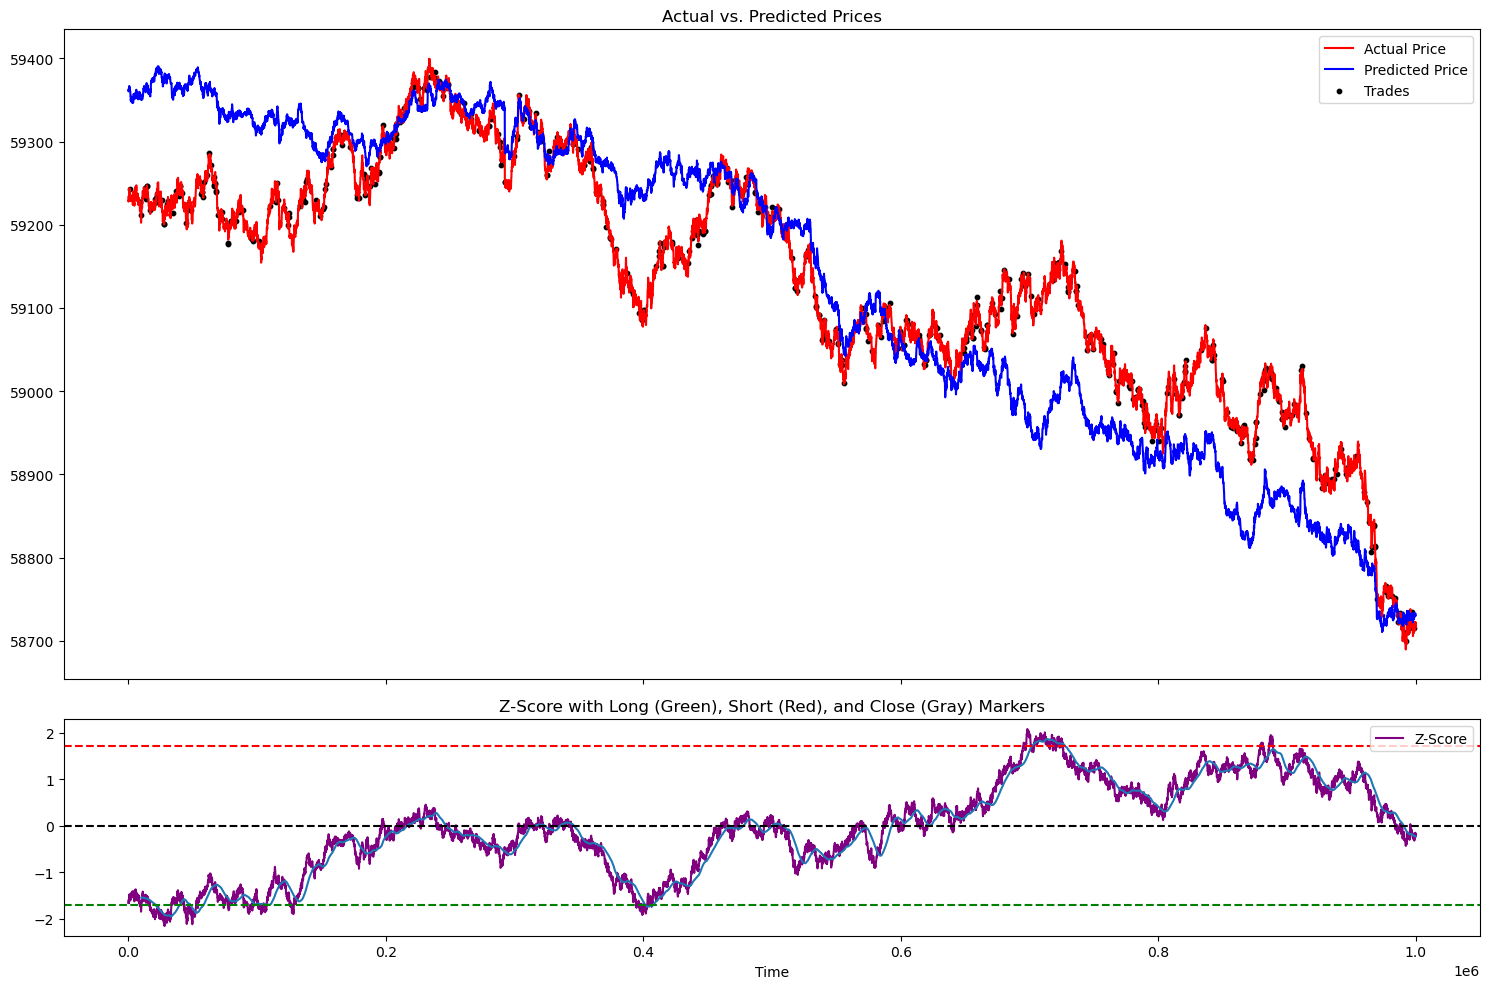

/var/folders/22/t8xqqxmj2g5c4pnhgzh4g8vw0000gq/T/ipykernel_40499/2458013263.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = result.params[0]


β = 1.000551937425337
Spread Mean: -15.955385810803095 Spread Std: 89.17198899703843


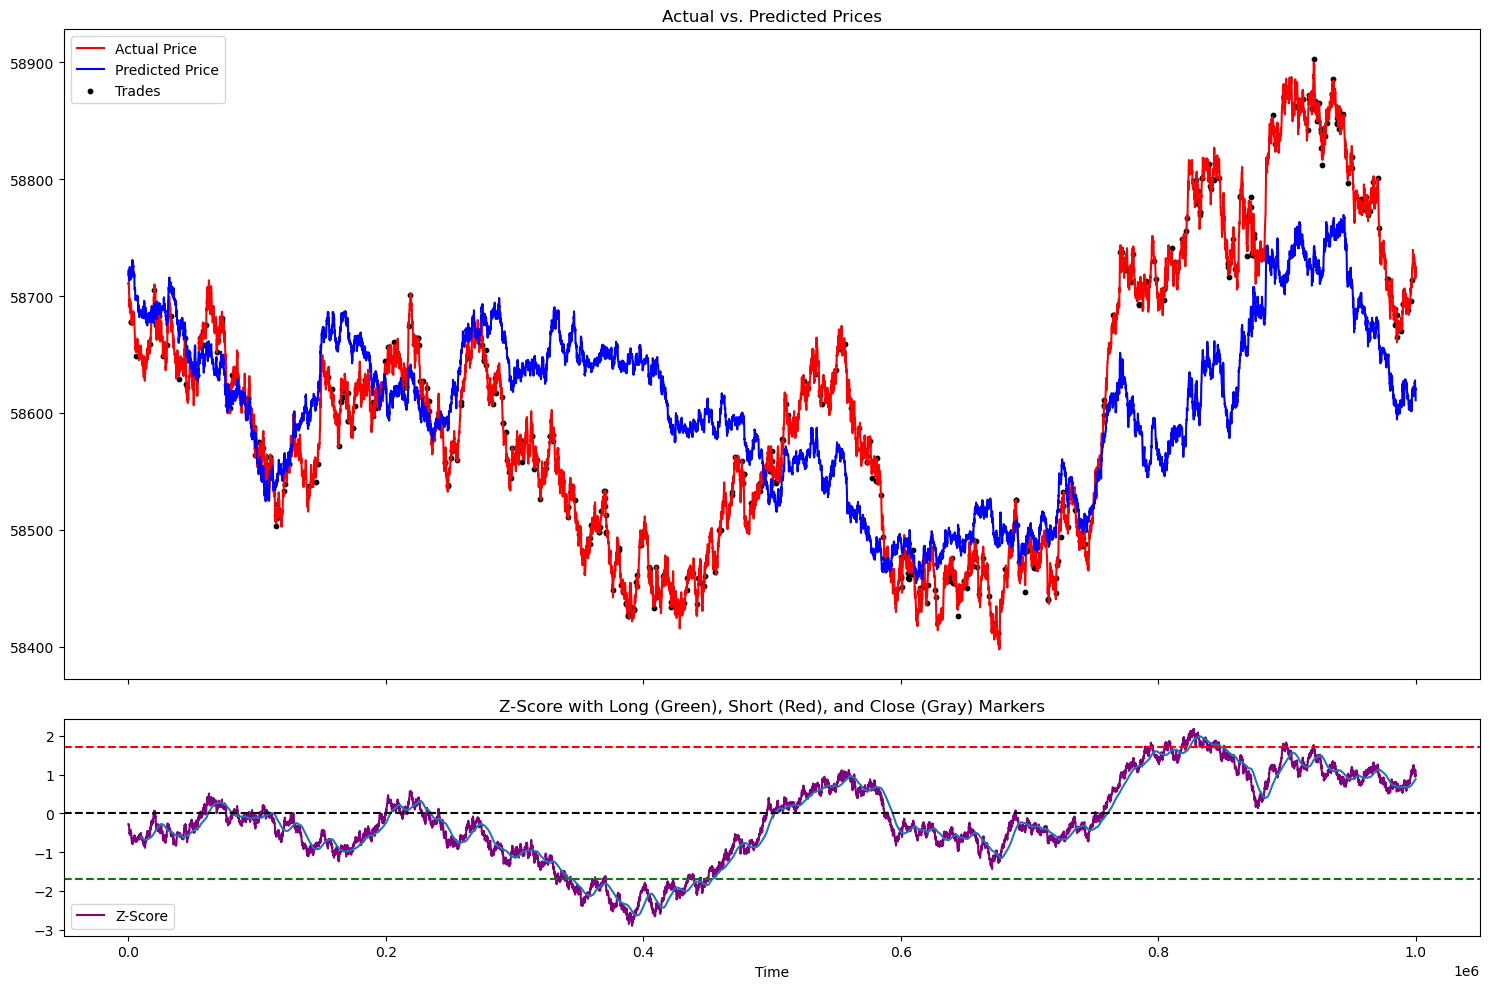


Average Stats across runs (spread mean, std, beta):
[ 0.13197598 83.56726951  1.0008242 ]


In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

means = []
stds = []
shit = []

N = 1000000
i = 3  # using all p1, p2, p3

for p, t in zip([p1, p2, p3][:i], [t1, t2, t3][:i]):
    prices_by_product = pd.DataFrame([
        p[p["product"] == product]["mid_price"].values
        for product in p["product"].unique()
    ])
    prices_by_product = prices_by_product.transpose()
    prices_by_product.columns = p["product"].unique()
    prices_by_product.index = p[p["product"] == "PICNIC_BASKET1"].index

    # Create combo
    prices_by_product["combo1"] = (
        6 * prices_by_product["CROISSANTS"] +
        1 * prices_by_product["DJEMBES"] +
        3 * prices_by_product["JAMS"]
    )

    trades_by_product = t[t["symbol"] == "PICNIC_BASKET1"]
    prices_by_product = prices_by_product[-N:]
    trades_by_product = trades_by_product.loc[prices_by_product.index[0]:]

    # OLS Regression: PICNIC_BASKET1 ~ combo1 (no intercept)
    model = smf.ols("PICNIC_BASKET1 ~ combo1 - 1", data=prices_by_product)
    result = model.fit()
    beta = result.params[0]
    print("β =", beta)

    # Spread and z-score
    spread = prices_by_product["PICNIC_BASKET1"] - 1.00082420e+00 * prices_by_product["combo1"]
    zscore = (spread - 5.47467078e-02) / 8.35605701e+01

    print("Spread Mean:", spread.mean(), "Spread Std:", spread.std())
    shit.append([spread.mean(), spread.std(), beta])

    means.append(spread.mean())
    stds.append(spread.std())

    # === Unified Signal Thresholds ===
    short_threshold = 1.7
    long_threshold = -1.7
    close_threshold = 0.2

    z_prev = zscore.shift(1)

    # === Long and Short Entries ===
    long_signal = zscore[(z_prev < long_threshold) & (zscore >= long_threshold)].index
    long_momentum = zscore[(z_prev < 1) & (zscore >= 1)].index
    long_entries = long_signal.union(long_momentum)

    short_entries = zscore[(z_prev < short_threshold) & (zscore >= short_threshold)].index

    # === Exit (close position when zscore moves back near 0) ===
    close_entries = zscore[(abs(z_prev) > close_threshold) & (abs(zscore) <= close_threshold)].index

    # === Plotting ===
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True,
                                   gridspec_kw={'height_ratios': [3, 1]})

    # Top Plot: Actual vs. Predicted Prices
    ax1.plot(prices_by_product["PICNIC_BASKET1"], label="Actual Price", color="red")
    ax1.plot(beta * prices_by_product["combo1"], label="Predicted Price", color="blue")
    ax1.scatter(trades_by_product.index, trades_by_product["price"], label="Trades", color="black", s=10)
    ax1.set_title("Actual vs. Predicted Prices")
    ax1.legend()

    # Highlight LONG (green), SHORT (red), CLOSE (gray)
    """for t in long_entries: ax1.axvline(t, color="green", alpha=0.3)
    for t in short_entries: ax1.axvline(t, color="red", alpha=0.3)
    for t in close_entries: ax1.axvline(t, color="gray", linestyle="-", alpha=0.3)"""

    # Bottom Plot: Z-Score
    ax2.plot(zscore, label="Z-Score", color="purple")
    ax2.plot(zscore.rolling(100).mean())
    ax2.axhline(0, color="black", linestyle="--")
    ax2.axhline(short_threshold, color="red", linestyle="--")
    ax2.axhline(long_threshold, color="green", linestyle="--")
    ax2.set_title("Z-Score with Long (Green), Short (Red), and Close (Gray) Markers")
    ax2.set_xlabel("Time")
    ax2.legend()

    """for t in long_entries: ax2.axvline(t, color="green", alpha=0.3)
    for t in short_entries: ax2.axvline(t, color="red", alpha=0.3)
    for t in close_entries: ax2.axvline(t, color="gray", linestyle="-", alpha=0.3)"""

    plt.tight_layout()
    plt.show()

# Summary stats
shit = np.array(shit)
print("\nAverage Stats across runs (spread mean, std, beta):")
print(np.mean(shit, axis=0))


β = 0.9987405230265339
                                 OLS Regression Results                                
Dep. Variable:         PICNIC_BASKET1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.145e+09
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:24   Log-Likelihood:                         -5432.1
No. Observations:                1000   AIC:                                  1.087e+04
Df Residuals:                     999   BIC:                                  1.087e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

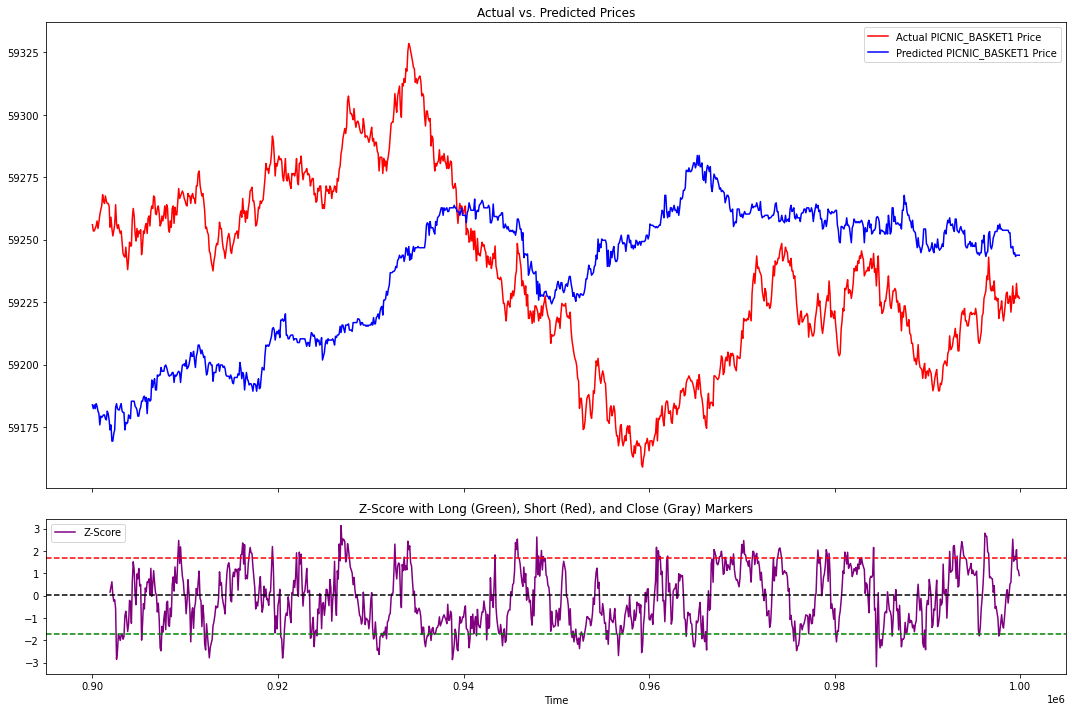

β = 1.0028842189994684
                                 OLS Regression Results                                
Dep. Variable:             CROISSANTS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.184e+08
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:25   Log-Likelihood:                         -3643.0
No. Observations:                1000   AIC:                                      7288.
Df Residuals:                     999   BIC:                                      7293.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

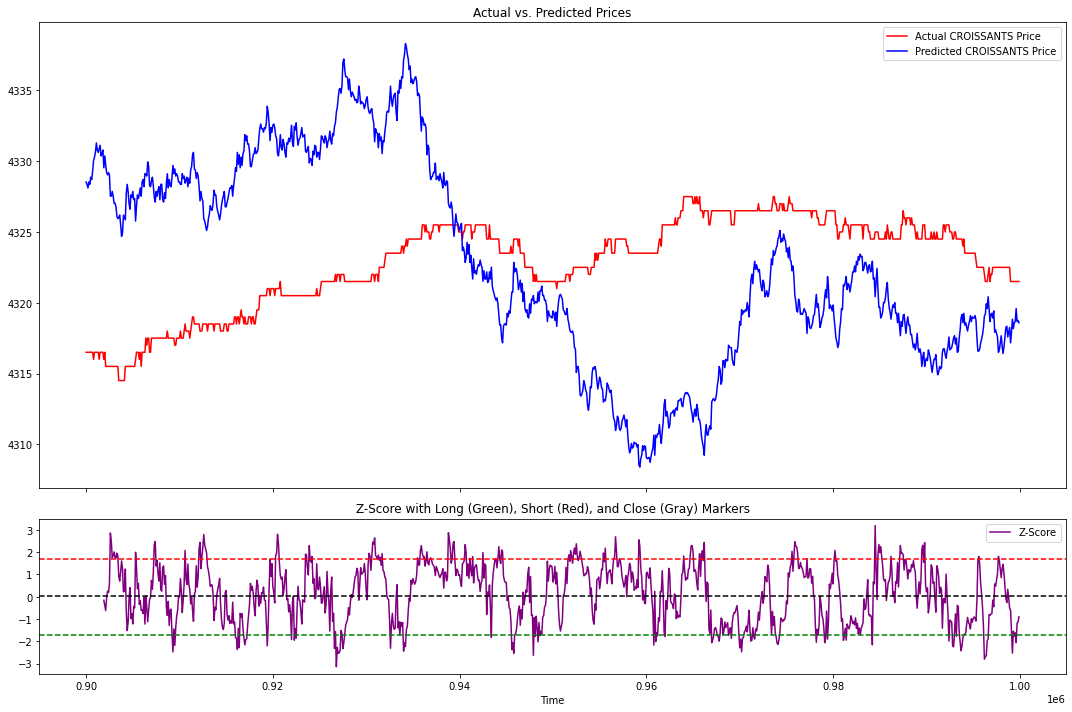

β = 1.0055621383400795
                                 OLS Regression Results                                
Dep. Variable:                DJEMBES   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.873e+07
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:25   Log-Likelihood:                         -5436.5
No. Observations:                1000   AIC:                                  1.087e+04
Df Residuals:                     999   BIC:                                  1.088e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

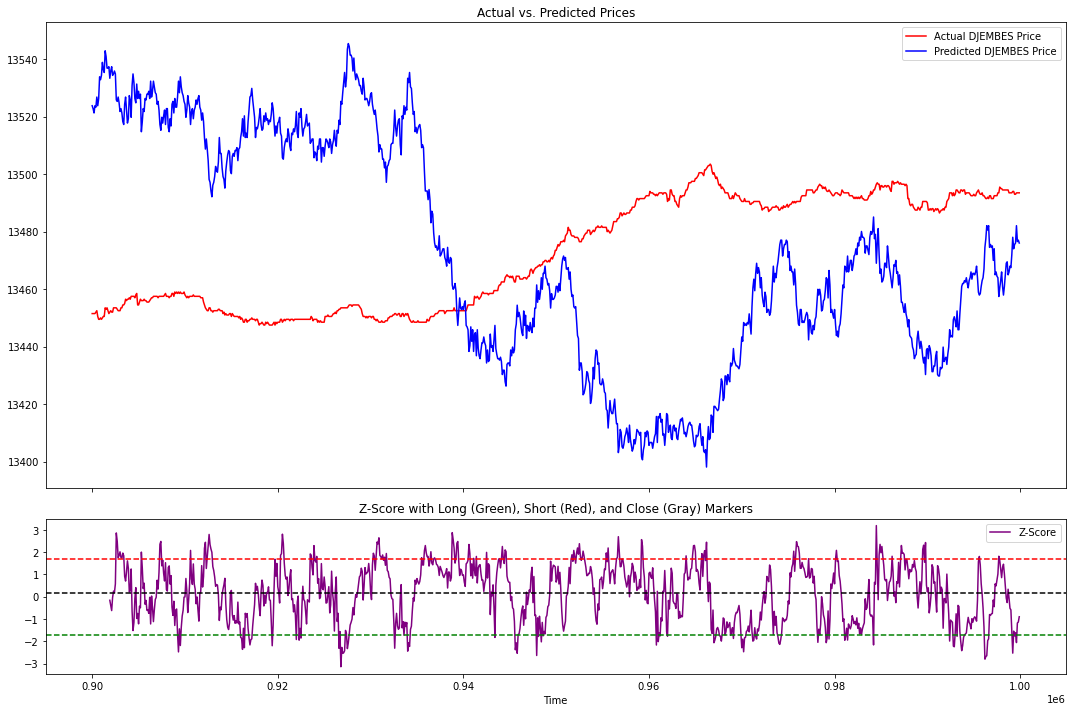

β = 1.00375749150469
                                 OLS Regression Results                                
Dep. Variable:                   JAMS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.280e+08
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:26   Log-Likelihood:                         -4338.3
No. Observations:                1000   AIC:                                      8679.
Df Residuals:                     999   BIC:                                      8684.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

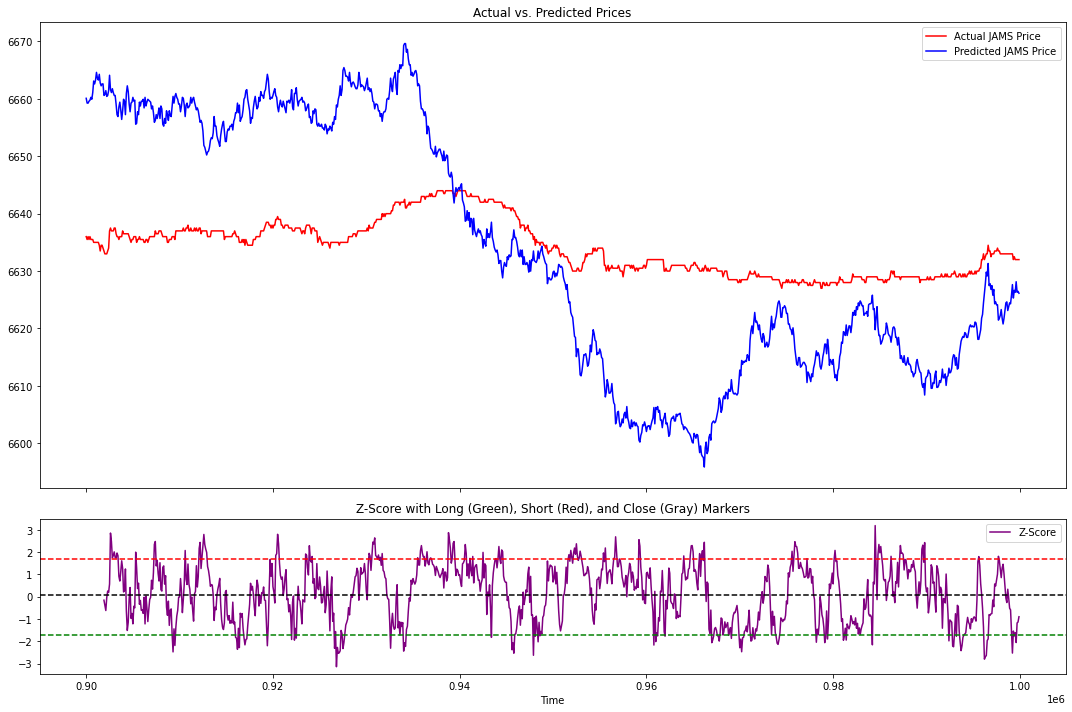

β = 1.0018505642480782
                                 OLS Regression Results                                
Dep. Variable:         PICNIC_BASKET1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.737e+09
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:27   Log-Likelihood:                         -5217.6
No. Observations:                1000   AIC:                                  1.044e+04
Df Residuals:                     999   BIC:                                  1.044e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

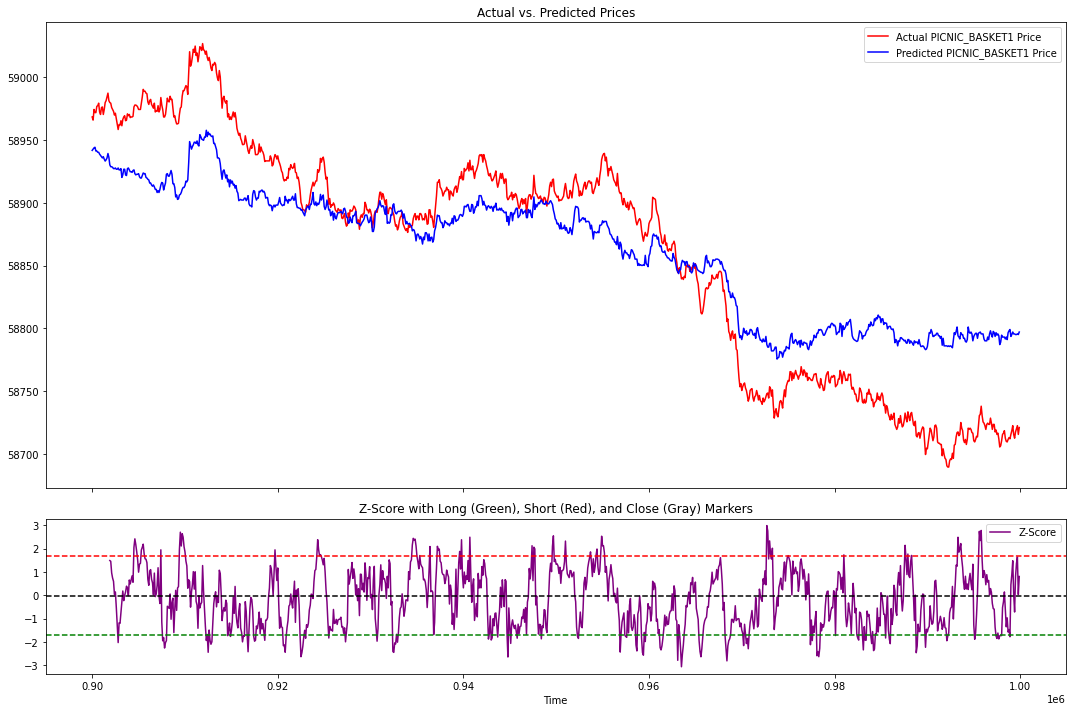

β = 0.9957779065532923
                                 OLS Regression Results                                
Dep. Variable:             CROISSANTS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.329e+08
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:27   Log-Likelihood:                         -3421.7
No. Observations:                1000   AIC:                                      6845.
Df Residuals:                     999   BIC:                                      6850.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

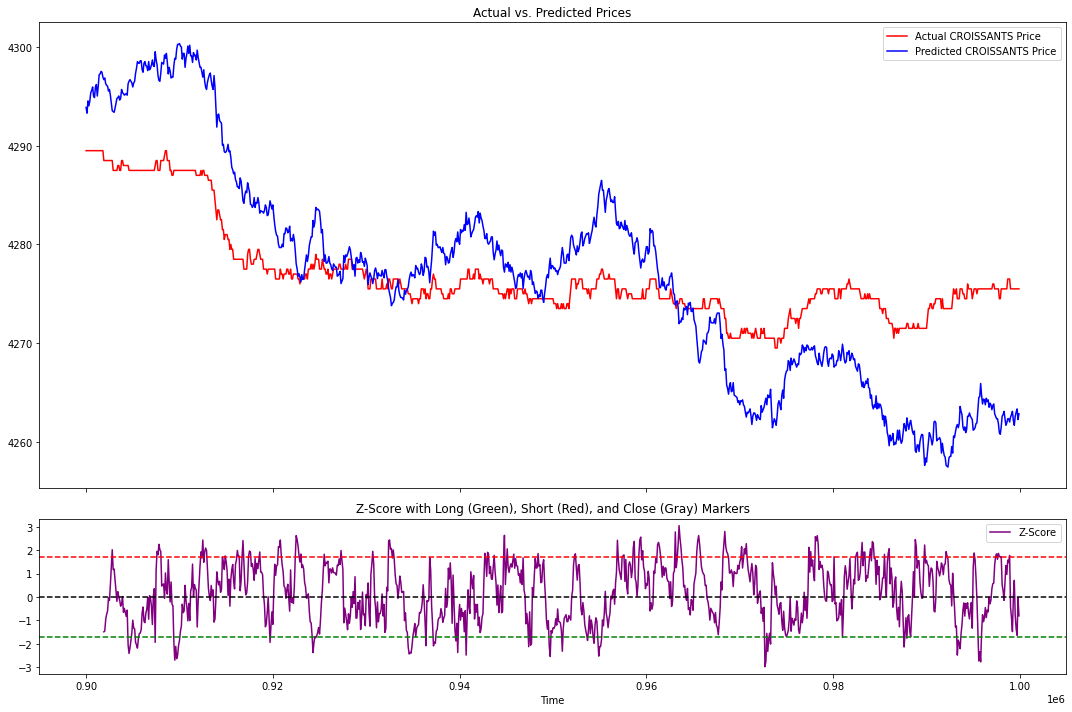

β = 0.9919546602449667
                                 OLS Regression Results                                
Dep. Variable:                DJEMBES   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.190e+07
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:28   Log-Likelihood:                         -5209.1
No. Observations:                1000   AIC:                                  1.042e+04
Df Residuals:                     999   BIC:                                  1.043e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

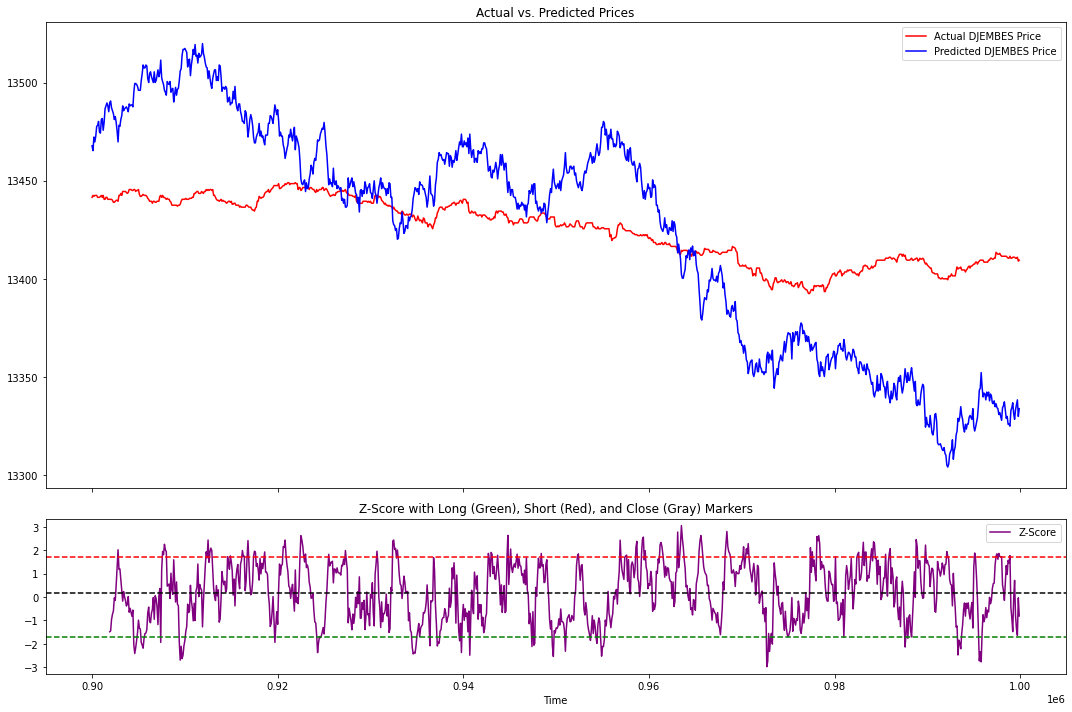

β = 0.9944973021094595
                                 OLS Regression Results                                
Dep. Variable:                   JAMS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.960e+08
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:28   Log-Likelihood:                         -4113.7
No. Observations:                1000   AIC:                                      8229.
Df Residuals:                     999   BIC:                                      8234.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

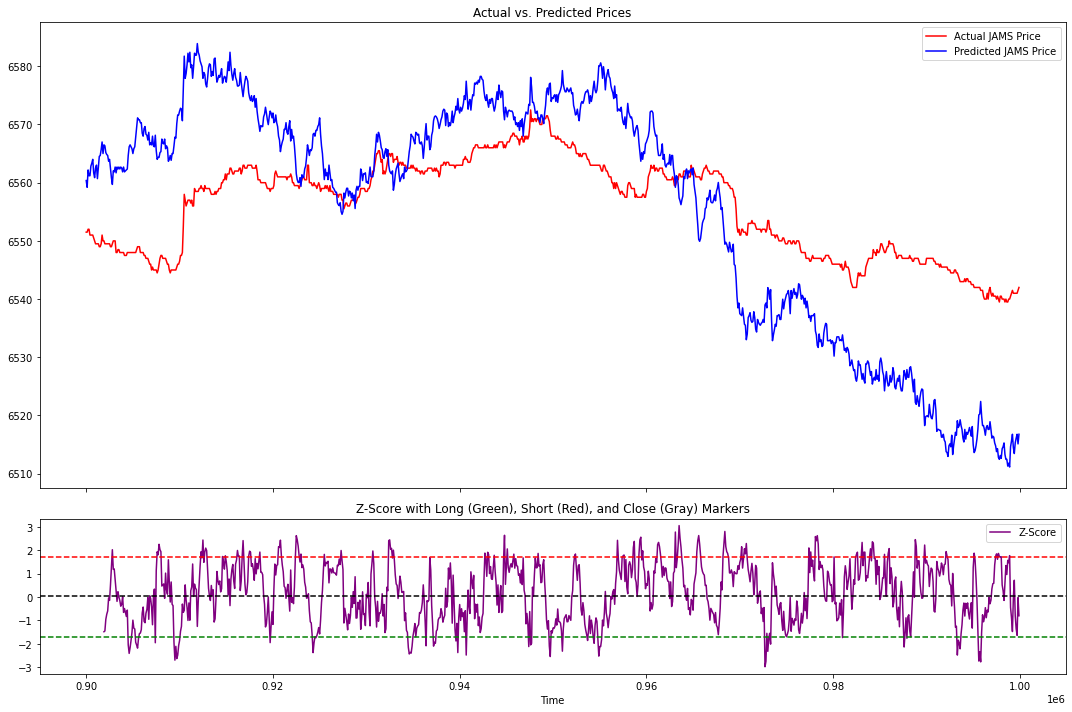

β = 1.0023008203201613
                                 OLS Regression Results                                
Dep. Variable:         PICNIC_BASKET1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.547e+09
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:29   Log-Likelihood:                         -4553.0
No. Observations:                1000   AIC:                                      9108.
Df Residuals:                     999   BIC:                                      9113.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

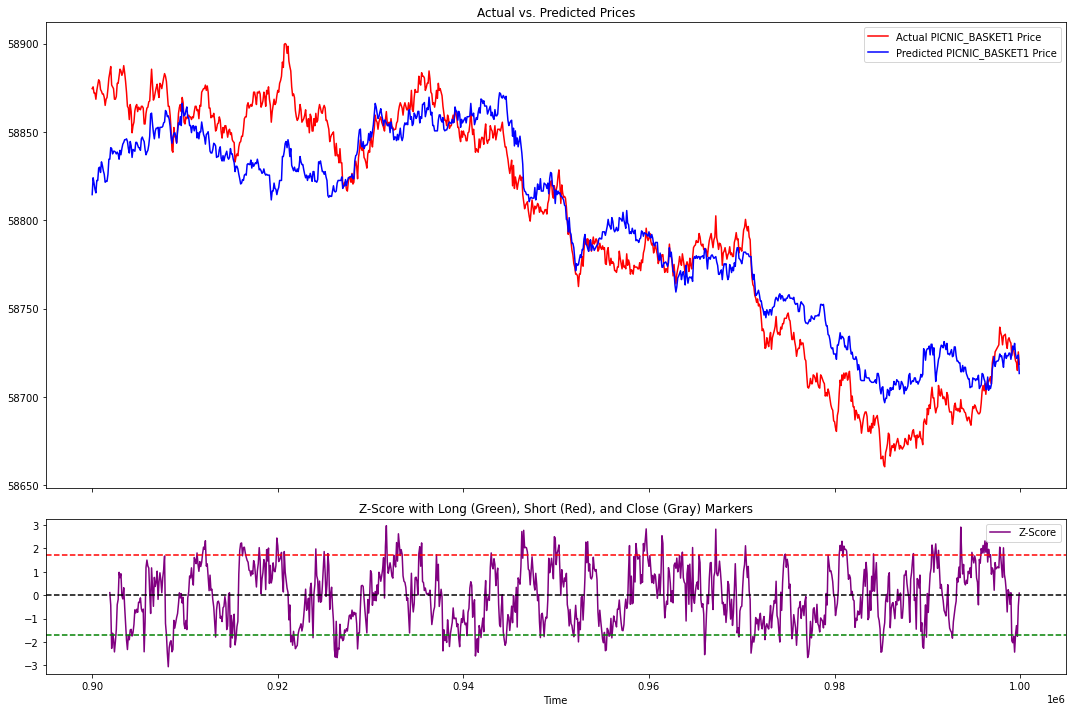

β = 0.9947715924396154
                                 OLS Regression Results                                
Dep. Variable:             CROISSANTS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.276e+09
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:30   Log-Likelihood:                         -2750.9
No. Observations:                1000   AIC:                                      5504.
Df Residuals:                     999   BIC:                                      5509.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

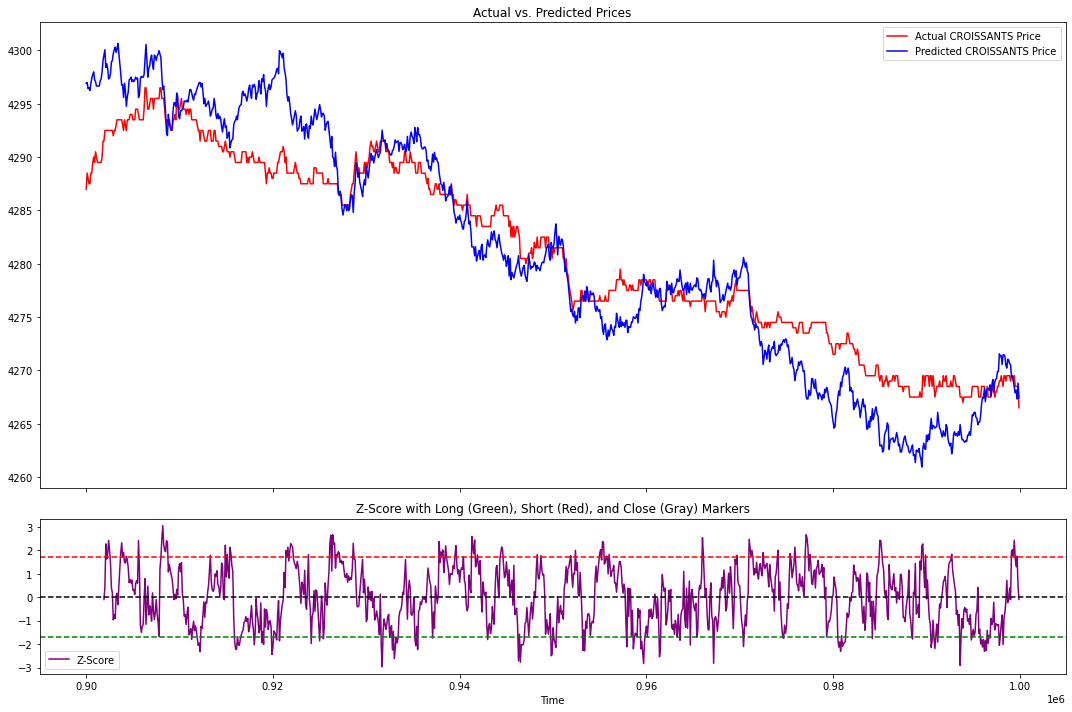

β = 0.9900241787591633
                                 OLS Regression Results                                
Dep. Variable:                DJEMBES   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.429e+08
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:30   Log-Likelihood:                         -4548.6
No. Observations:                1000   AIC:                                      9099.
Df Residuals:                     999   BIC:                                      9104.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

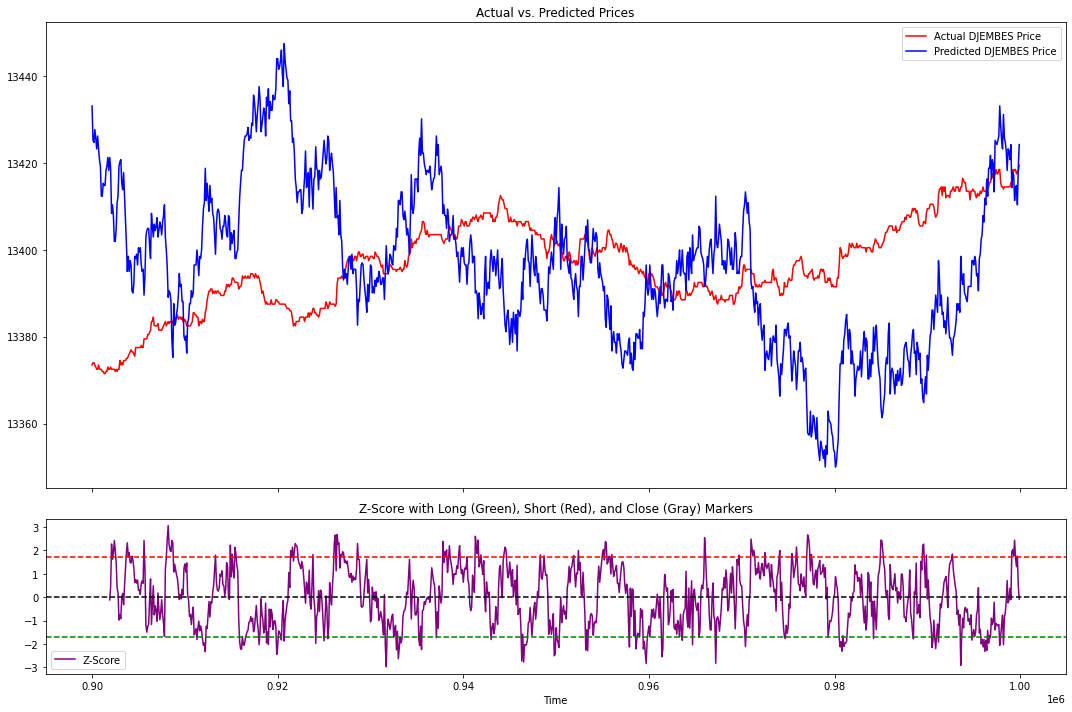

β = 0.9931523999891666
                                 OLS Regression Results                                
Dep. Variable:                   JAMS   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.318e+08
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:38:31   Log-Likelihood:                         -3450.3
No. Observations:                1000   AIC:                                      6903.
Df Residuals:                     999   BIC:                                      6908.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

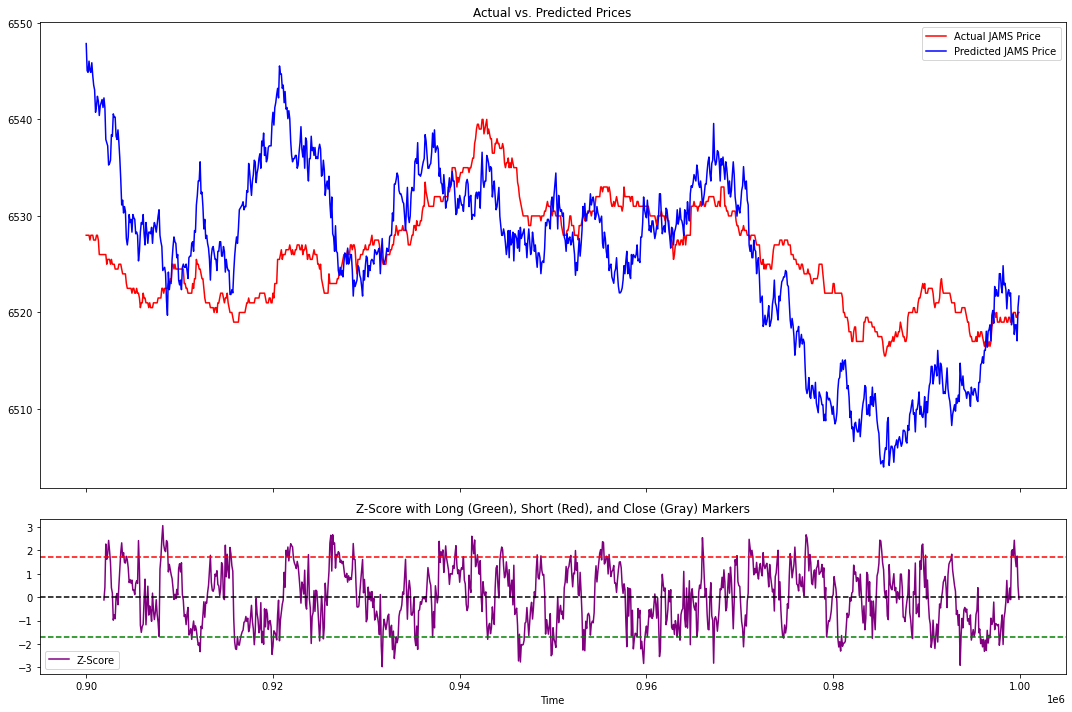


Average Stats across runs (spread mean, std, beta):
[ 0.04209366 25.59791372  0.99793948]


In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

means = []
stds = []
shit = []

N = 1000
i = 3  # using all p1, p2, p3

for p, t in zip([p1, p2, p3][:i], [t1, t2, t3][:i]):
    prices_by_product = pd.DataFrame([
        p[p["product"] == product]["mid_price"].values
        for product in p["product"].unique()
    ])
    prices_by_product = prices_by_product.transpose()
    prices_by_product.columns = p["product"].unique()
    prices_by_product.index = p[p["product"] == "PICNIC_BASKET1"].index

    # Create combo
    prices_by_product["combopb1"] = (
        6 * prices_by_product["CROISSANTS"] +
        1 * prices_by_product["DJEMBES"] +
        3 * prices_by_product["JAMS"]
    )

    prices_by_product["comboc1"] = (
        1/6 * prices_by_product["PICNIC_BASKET1"] +
        -1/6 * prices_by_product["DJEMBES"] +
        -3/6 * prices_by_product["JAMS"]
    )

    prices_by_product["combod1"] = (
        -6 * prices_by_product["CROISSANTS"] +
        1 * prices_by_product["PICNIC_BASKET1"] +
        -3 * prices_by_product["JAMS"]
    )

    prices_by_product["comboj1"] = (
        -6/3 * prices_by_product["CROISSANTS"] +
        -1/3 * prices_by_product["DJEMBES"] +
        1/3 * prices_by_product["PICNIC_BASKET1"]
    )

    prices_by_product = prices_by_product[-N:]
    trades_by_product = trades_by_product.loc[prices_by_product.index[0]:]

    # OLS Regression: PICNIC_BASKET1 ~ combo1 (no intercept)
    for combo, thing in zip(["combopb1", "comboc1", "combod1", "comboj1"], ["PICNIC_BASKET1", "CROISSANTS", "DJEMBES", "JAMS"]):
        trades_by_product = t[t["symbol"] == thing]

        model = smf.ols(f"{thing} ~ {combo} - 1", data=prices_by_product)
        result = model.fit()
        beta = result.params.iloc[0]
        print("β =", beta)
        print(result.summary())

        # Spread and z-score
        spread = prices_by_product[thing] - beta * prices_by_product[combo]
        param = 20
        zscore = (spread - pd.Series(spread).rolling(param).mean()) / pd.Series(spread).rolling(param).std()

        print("Spread Mean:", spread.mean(), "Spread Std:", spread.std())
        shit.append([spread.mean(), spread.std(), beta])

        means.append(spread.mean())
        stds.append(spread.std())

        # === Unified Signal Thresholds ===
        short_threshold = 1.7
        long_threshold = -1.7
        close_threshold = 0.2

        z_prev = zscore.shift(1)

        # === Long and Short Entries ===
        long_signal = zscore[(z_prev < long_threshold) & (zscore >= long_threshold)].index
        long_momentum = zscore[(z_prev < 1) & (zscore >= 1)].index
        long_entries = long_signal.union(long_momentum)

        short_entries = zscore[(z_prev < short_threshold) & (zscore >= short_threshold)].index

        # === Exit (close position when zscore moves back near 0) ===
        close_entries = zscore[(abs(z_prev) > close_threshold) & (abs(zscore) <= close_threshold)].index

        # === Plotting ===
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True,
                                    gridspec_kw={'height_ratios': [3, 1]})

        # Top Plot: Actual vs. Predicted Prices
        ax1.plot(prices_by_product[thing], label=f"Actual {thing} Price", color="red")
        ax1.plot(beta * prices_by_product[combo], label=f"Predicted {thing} Price", color="blue")
        #ax1.scatter(trades_by_product.index, trades_by_product["price"], label="Trades", color="black", s=10)
        ax1.set_title("Actual vs. Predicted Prices")
        ax1.legend()

        # Highlight LONG (green), SHORT (red), CLOSE (gray)
        """for t in long_entries: ax1.axvline(t, color="green", alpha=0.3)
        for t in short_entries: ax1.axvline(t, color="red", alpha=0.3)
        for t in close_entries: ax1.axvline(t, color="gray", linestyle="-", alpha=0.3)"""

        # Bottom Plot: Z-Score
        ax2.plot(zscore, label="Z-Score", color="purple")
        ax2.axhline(spread.mean(), color="black", linestyle="--")
        ax2.axhline(short_threshold, color="red", linestyle="--")
        ax2.axhline(long_threshold, color="green", linestyle="--")
        ax2.set_title("Z-Score with Long (Green), Short (Red), and Close (Gray) Markers")
        ax2.set_xlabel("Time")
        ax2.legend()

        """for t in long_entries: ax2.axvline(t, color="green", alpha=0.3)
        for t in short_entries: ax2.axvline(t, color="red", alpha=0.3)
        for t in close_entries: ax2.axvline(t, color="gray", linestyle="-", alpha=0.3)"""

        plt.tight_layout()
        plt.show()

# Summary stats
shit = np.array(shit)
print("\nAverage Stats across runs (spread mean, std, beta):")
print(np.mean(shit, axis=0))

In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

means = []
stds = []
shit = []

N = 1000
i = 3  # using all p1, p2, p3

for p, t in zip([p1, p2, p3][:i], [t1, t2, t3][:i]):
    prices_by_product = pd.DataFrame([
        p[p["product"] == product]["mid_price"].values
        for product in p["product"].unique()
    ])
    prices_by_product = prices_by_product.transpose()
    prices_by_product.columns = p["product"].unique()
    prices_by_product.index = p[p["product"] == "PICNIC_BASKET1"].index

    # Create combo
    prices_by_product["combopb2"] = (
        4 * prices_by_product["CROISSANTS"] +
        0 * prices_by_product["DJEMBES"] +
        2 * prices_by_product["JAMS"]
    )

    prices_by_product = prices_by_product[-N:]
    trades_by_product = trades_by_product.loc[prices_by_product.index[0]:]

    # OLS Regression: PICNIC_BASKET1 ~ combo1 (no intercept)
    combo = "combop"
    trades_by_product = t[t["symbol"] == thing]

    model = smf.ols(f"{thing} ~ {combo} - 1", data=prices_by_product)
    result = model.fit()
    beta = result.params.iloc[0]
    print("β =", beta)
    print(result.summary())

    # Spread and z-score
    spread = prices_by_product[thing] - beta * prices_by_product[combo]
    param = 20
    zscore = (spread - pd.Series(spread).rolling(param).mean()) / pd.Series(spread).rolling(param).std()

    print("Spread Mean:", spread.mean(), "Spread Std:", spread.std())
    shit.append([spread.mean(), spread.std(), beta])

    means.append(spread.mean())
    stds.append(spread.std())

    # === Unified Signal Thresholds ===
    short_threshold = 1.7
    long_threshold = -1.7
    close_threshold = 0.2

    z_prev = zscore.shift(1)

    # === Long and Short Entries ===
    long_signal = zscore[(z_prev < long_threshold) & (zscore >= long_threshold)].index
    long_momentum = zscore[(z_prev < 1) & (zscore >= 1)].index
    long_entries = long_signal.union(long_momentum)

    short_entries = zscore[(z_prev < short_threshold) & (zscore >= short_threshold)].index

    # === Exit (close position when zscore moves back near 0) ===
    close_entries = zscore[(abs(z_prev) > close_threshold) & (abs(zscore) <= close_threshold)].index

    # === Plotting ===
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True,
                                gridspec_kw={'height_ratios': [3, 1]})

    # Top Plot: Actual vs. Predicted Prices
    ax1.plot(prices_by_product[thing], label=f"Actual {thing} Price", color="red")
    ax1.plot(beta * prices_by_product[combo], label=f"Predicted {thing} Price", color="blue")
    #ax1.scatter(trades_by_product.index, trades_by_product["price"], label="Trades", color="black", s=10)
    ax1.set_title("Actual vs. Predicted Prices")
    ax1.legend()

    # Highlight LONG (green), SHORT (red), CLOSE (gray)
    """for t in long_entries: ax1.axvline(t, color="green", alpha=0.3)
    for t in short_entries: ax1.axvline(t, color="red", alpha=0.3)
    for t in close_entries: ax1.axvline(t, color="gray", linestyle="-", alpha=0.3)"""

    # Bottom Plot: Z-Score
    ax2.plot(zscore, label="Z-Score", color="purple")
    ax2.axhline(spread.mean(), color="black", linestyle="--")
    ax2.axhline(short_threshold, color="red", linestyle="--")
    ax2.axhline(long_threshold, color="green", linestyle="--")
    ax2.set_title("Z-Score with Long (Green), Short (Red), and Close (Gray) Markers")
    ax2.set_xlabel("Time")
    ax2.legend()

    """for t in long_entries: ax2.axvline(t, color="green", alpha=0.3)
    for t in short_entries: ax2.axvline(t, color="red", alpha=0.3)
    for t in close_entries: ax2.axvline(t, color="gray", linestyle="-", alpha=0.3)"""

    plt.tight_layout()
    plt.show()

# Summary stats
shit = np.array(shit)
print("\nAverage Stats across runs (spread mean, std, beta):")
print(np.mean(shit, axis=0))

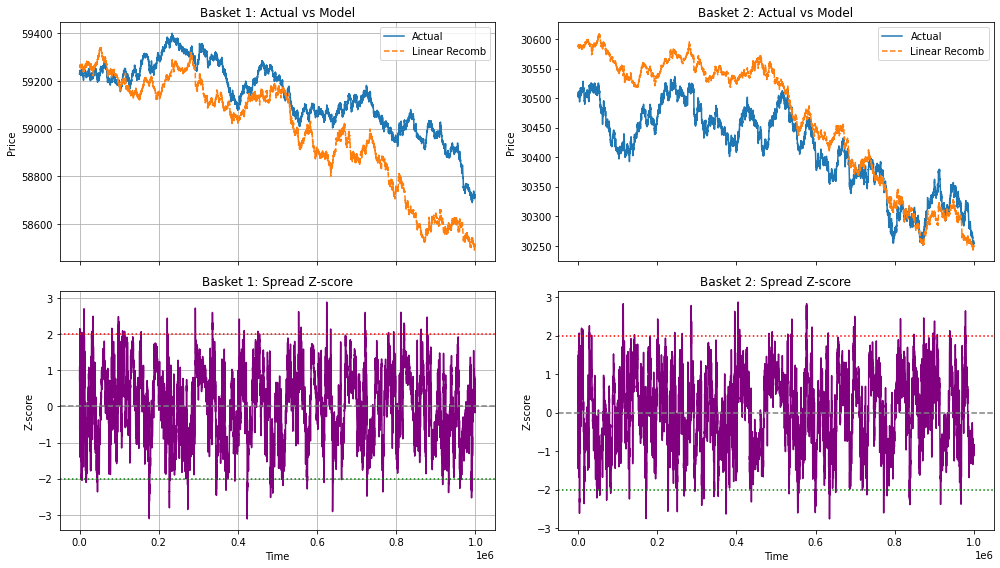

In [ ]:
N = 0
L = 10000

# Slice the DataFrame
window = slice(N, N + L)

p = p2

prices_by_product = pd.DataFrame([p[p["product"] == product]["mid_price"].values for product in p["product"].unique()])
prices_by_product = prices_by_product.transpose()
prices_by_product.columns = p["product"].unique()
prices_by_product.index = p[p["product"] == "KELP"].index

prices_by_product["combo1"] = (
    6 * prices_by_product["CROISSANTS"] +
    1 * prices_by_product["DJEMBES"] +
    3 * prices_by_product["JAMS"]
)

prices_by_product["combo2"] = (
    4 * prices_by_product["CROISSANTS"] +
    2 * prices_by_product["JAMS"]
)

# --- Compute spreads and z-scores ---
lookback = 100  # You can tune this
spread1 = prices_by_product["PICNIC_BASKET1"] - result_basket_1.predict(prices_by_product)
spread2 = prices_by_product["PICNIC_BASKET2"] - result_basket_2.predict(prices_by_product)

zscore1 = (spread1 - spread1.ewm(span = lookback).mean()) / spread1.ewm(span = lookback).std()
zscore2 = (spread2 - spread2.ewm(span = lookback).mean()) / spread2.ewm(span = lookback).std()

# --- Plot ---
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

# --- Basket 1 Price Comparison ---
axs[0, 0].plot(prices_by_product["PICNIC_BASKET1"].iloc[window], label="Actual")
axs[0, 0].plot(result_basket_1.predict(prices_by_product).iloc[window], label="Linear Recomb", linestyle="--")
axs[0, 0].set_title("Basket 1: Actual vs Model")
axs[0, 0].set_ylabel("Price")
axs[0, 0].legend()
axs[0, 0].grid()

# --- Basket 1 Spread Z-score ---
axs[1, 0].plot(zscore1.iloc[window], color='purple')
axs[1, 0].axhline(0, color='gray', linestyle='--')
axs[1, 0].axhline(2, color='red', linestyle=':')
axs[1, 0].axhline(-2, color='green', linestyle=':')
axs[1, 0].set_title("Basket 1: Spread Z-score")
axs[1, 0].set_ylabel("Z-score")
axs[1, 0].set_xlabel("Time")
axs[1, 0].grid()

# --- Basket 2 Price Comparison ---
axs[0, 1].plot(prices_by_product["PICNIC_BASKET2"].iloc[window], label="Actual")
axs[0, 1].plot(result_basket_2.predict(prices_by_product).iloc[window], label="Linear Recomb", linestyle="--")
axs[0, 1].set_title("Basket 2: Actual vs Model")
axs[0, 1].set_ylabel("Price")
axs[0, 1].legend()

# --- Basket 2 Spread Z-score ---
axs[1, 1].plot(zscore2.iloc[window], color='purple')
axs[1, 1].axhline(0, color='gray', linestyle='--')
axs[1, 1].axhline(2, color='red', linestyle=':')
axs[1, 1].axhline(-2, color='green', linestyle=':')
axs[1, 1].set_title("Basket 2: Spread Z-score")
axs[1, 1].set_ylabel("Z-score")
axs[1, 1].set_xlabel("Time")

plt.tight_layout()
plt.show()
